# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75'])
            


# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,r_MIN,r_MAX,r_MEAN,...,g_Q25,g_Q50,g_Q75,b_MIN,b_MAX,b_MEAN,b_STD,b_Q25,b_Q50,b_Q75
0,6.824,9.240,1912,784,-0.73,2.58,2.33,13,247,117.308148,...,95,136,172,10,232,92.565868,35.145074,63,92,120
1,8.189,9.622,2005,818,0.59,2.92,2.47,24,234,116.193248,...,89,136,177,15,191,96.102318,36.135511,66,97,126
2,8.380,9.589,2001,818,0.78,2.88,2.44,18,222,118.713846,...,96,138,178,12,187,97.222011,35.938764,68,97,127
3,8.137,9.449,2040,833,0.52,2.72,2.55,15,222,114.468779,...,89,133,176,10,199,96.135305,35.908361,67,96,127
4,7.696,9.401,1758,717,0.22,2.83,2.14,8,227,116.849925,...,88,132,176,13,207,100.635043,38.062522,69,99,132


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   r_MIN          103 non-null    int64  
 8   r_MAX          103 non-null    int64  
 9   r_MEAN         103 non-null    float64
 10  r_STD          103 non-null    float64
 11  r_Q25          103 non-null    int64  
 12  r_Q50          103 non-null    int64  
 13  r_Q75          103 non-null    int64  
 14  g_MIN          103 non-null    int64  
 15  g_MAX          103 non-null    int64  
 16  g_MEAN         103 non-null    float64
 17  g_STD          103 non-null    float64
 18  g_Q25     

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_5702/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,r_MIN,r_MAX,r_MEAN,...,g_Q25,g_Q50,g_Q75,b_MIN,b_MAX,b_MEAN,b_STD,b_Q25,b_Q50,b_Q75
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,11.378641,230.640777,110.887259,...,90.864078,132.155340,168.893204,12.621359,214.495146,97.487968,35.164575,68.747573,97.718447,125.669903
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,9.139568,14.898911,13.142533,...,16.629202,14.583604,13.249427,8.475011,21.437951,10.980674,5.338700,13.415471,12.490324,12.033767
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,2.000000,186.000000,76.511395,...,53.000000,95.000000,129.000000,2.000000,152.000000,71.905752,20.570709,42.000000,69.000000,94.000000
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,5.000000,220.000000,101.210585,...,80.000000,123.000000,160.500000,7.000000,199.000000,90.400818,31.746440,58.500000,89.500000,119.000000
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,8.000000,233.000000,109.991054,...,90.000000,135.000000,170.000000,10.000000,212.000000,96.440293,36.135511,67.000000,98.000000,127.000000
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,15.000000,244.000000,120.317332,...,103.000000,141.000000,178.000000,17.000000,234.500000,104.549168,39.139044,78.500000,107.000000,134.000000
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,56.000000,251.000000,143.611361,...,134.000000,170.000000,196.000000,51.000000,251.000000,124.176596,45.825416,103.000000,129.000000,151.000000


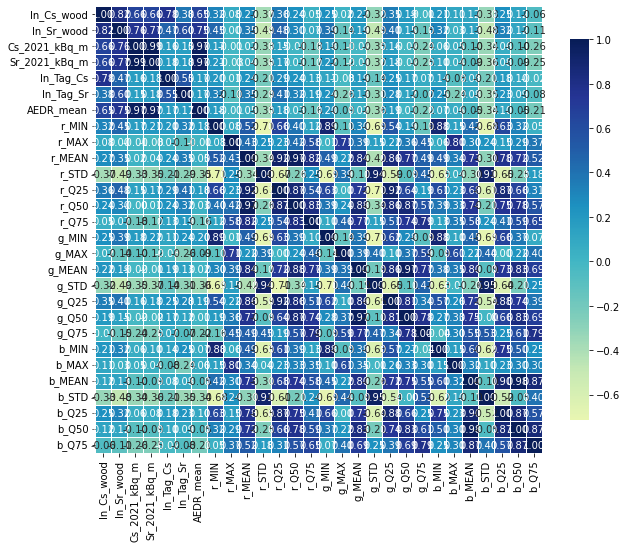

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75'])
y = pd.DataFrame(select, columns= ['ln_Tag_Cs'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,r_MIN,r_MAX,r_MEAN,r_STD,r_Q25,r_Q50,r_Q75,g_MIN,g_MAX,g_MEAN,...,b_MEAN,b_STD,b_Q25,b_Q50,b_Q75,Random1,Random2,Random3,Random4,Random5
0,13,247,117.308148,44.595278,80,120,153,18,243,133.748091,...,92.565868,35.145074,63,92,120,10.790916,8.448987,7.984565,4.974869,15.948983
1,24,234,116.193248,43.749380,79,120,153,21,248,132.240460,...,96.102318,36.135511,66,97,126,7.625289,11.553568,11.326143,6.693354,8.844637
2,18,222,118.713846,42.450775,84,121,155,20,240,135.985871,...,97.222011,35.938764,68,97,127,7.302956,6.746927,10.292528,7.107790,6.470115
3,15,222,114.468779,42.851746,78,116,152,15,244,131.566750,...,96.135305,35.908361,67,96,127,8.431825,9.113175,13.709760,9.665302,10.149929
4,8,227,116.849925,44.170268,80,119,155,12,243,131.173455,...,100.635043,38.062522,69,99,132,10.765330,8.660973,11.365012,9.438912,10.992391


In [11]:
# Columns in "y" data collections
y.head()

,ln_Tag_Cs
0,-0.73
1,0.59
2,0.78
3,0.52
4,0.22


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.7492113426905125, -0.5760113778386349, 0.019910312382370177]
    Mean: -0.435
    Std: 0.329

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.17041398 1.04077534 1.12255644]
    Mean: 1.111
    Std: 0.054

 --------------------
Mean absolute error (MAE): 

    Scores: [0.7754486569325838, 0.6893638545895845, 0.7779456994496285]
    Mean: 0.748
    Std: 0.041

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model with rank: 1
Mean validation score: -0.286 (std: 0.365)
Parameters: {'colsample_bytree': 0.24467994968677076, 'gamma': 0.16957041534833256, 'learning_rate': 0.08157469517210761, 'max_depth': 4, 'n_estimators': 154, 'subsample': 0.8798458870595751}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.33271914, 1.59105139, 0.18937864, 0.52690725, 0.96306024,
       0.32873516, 0.77062593, 0.84463296, 0.40292387, 0.61898537]), 'std_fit_time': array([0.10659912, 2.43276499, 0.01369716, 0.12146771, 0.26082778,
       0.08495259, 0.10282896, 0.48290199, 0.03381825, 0.05540349]), 'mean_score_time': array([0.00777407, 0.01113181, 0.00673223, 0.00715518, 0.010285  ,
       0.00848012, 0.00710154, 0.00924711, 0.00765452, 0.007443  ]), 'std_score_time': array([0.00136268, 0.00767439, 0.00030327, 0.00088084, 0.00362872,
       0.00192929, 0.00029065, 0.00374318, 0.00037822, 0.00035362]), 'param_colsample_bytree': masked_array(data=[0.20119946920793197, 0.9283037717935837,
                   0.5991269889649184, 0.2460627121357234,
                   0.2838018516835531, 0.1596501542899943,
                   0.24467994968677076, 0.5739669695794926,
                   0.5424777977497682, 0.12165966857526848],
             mask=[False, False, False, False, False, False,

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.24467994968677076
Gamma: 0.16957041534833256
Learning_rate: 0.08157469517210761
Max_depth: 4
N_estimators: 154
Subsample: 0.8798458870595751


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.20003	validation_1-rmse:1.58110
[1]	validation_0-rmse:1.14487	validation_1-rmse:1.54429


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.10350	validation_1-rmse:1.50735
[3]	validation_0-rmse:1.04861	validation_1-rmse:1.49734
[4]	validation_0-rmse:1.00546	validation_1-rmse:1.47302
[5]	validation_0-rmse:0.95940	validation_1-rmse:1.45097
[6]	validation_0-rmse:0.92168	validation_1-rmse:1.44207
[7]	validation_0-rmse:0.88780	validation_1-rmse:1.42334
[8]	validation_0-rmse:0.84860	validation_1-rmse:1.41492
[9]	validation_0-rmse:0.81656	validation_1-rmse:1.39416
[10]	validation_0-rmse:0.78122	validation_1-rmse:1.35761
[11]	validation_0-rmse:0.75206	validation_1-rmse:1.34284
[12]	validation_0-rmse:0.72723	validation_1-rmse:1.33600
[13]	validation_0-rmse:0.69239	validation_1-rmse:1.33676
[14]	validation_0-rmse:0.66686	validation_1-rmse:1.32827
[15]	validation_0-rmse:0.65201	validation_1-rmse:1.32831
[16]	validation_0-rmse:0.62830	validation_1-rmse:1.31948
[17]	validation_0-rmse:0.61040	validation_1-rmse:1.31936
[18]	validation_0-rmse:0.59382	validation_1-rmse:1.31761
[19]	validation_0-rmse:0.57367	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.00594	validation_1-rmse:1.43114
[5]	validation_0-rmse:0.95964	validation_1-rmse:1.42851
[6]	validation_0-rmse:0.92349	validation_1-rmse:1.40530
[7]	validation_0-rmse:0.90440	validation_1-rmse:1.39749
[8]	validation_0-rmse:0.87443	validation_1-rmse:1.38625
[9]	validation_0-rmse:0.84154	validation_1-rmse:1.35059
[10]	validation_0-rmse:0.81202	validation_1-rmse:1.33342
[11]	validation_0-rmse:0.78867	validation_1-rmse:1.31838
[12]	validation_0-rmse:0.76408	validation_1-rmse:1.30508
[13]	validation_0-rmse:0.74045	validation_1-rmse:1.29348
[14]	validation_0-rmse:0.71942	validation_1-rmse:1.28490
[15]	validation_0-rmse:0.69624	validation_1-rmse:1.26385
[16]	validation_0-rmse:0.67536	validation_1-rmse:1.25518
[17]	validation_0-rmse:0.65698	validation_1-rmse:1.22956
[18]	validation_0-rmse:0.63527	validation_1-rmse:1.22350
[19]	validation_0-rmse:0.60953	validation_1-rmse:1.21400
[20]	validation_0-rmse:0.57905	validation_1-rmse:1.21686
[21]	validation_0-rmse:0.56572	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.93693	validation_1-rmse:0.92548
[8]	validation_0-rmse:0.89082	validation_1-rmse:0.91328
[9]	validation_0-rmse:0.85115	validation_1-rmse:0.92217
[10]	validation_0-rmse:0.81402	validation_1-rmse:0.92060
[11]	validation_0-rmse:0.78207	validation_1-rmse:0.92893
[12]	validation_0-rmse:0.75688	validation_1-rmse:0.92700
[13]	validation_0-rmse:0.72463	validation_1-rmse:0.93746
[14]	validation_0-rmse:0.69799	validation_1-rmse:0.93586
[15]	validation_0-rmse:0.67256	validation_1-rmse:0.93763
[16]	validation_0-rmse:0.65458	validation_1-rmse:0.93797
[17]	validation_0-rmse:0.63020	validation_1-rmse:0.92444
[18]	validation_0-rmse:0.61638	validation_1-rmse:0.92125
[19]	validation_0-rmse:0.59353	validation_1-rmse:0.91564
[20]	validation_0-rmse:0.56430	validation_1-rmse:0.92786
[21]	validation_0-rmse:0.54902	validation_1-rmse:0.93014
[22]	validation_0-rmse:0.52747	validation_1-rmse:0.93516
[23]	validation_0-rmse:0.50627	validation_1-rmse:0.93295
[24]	validation_0-rmse:0.49247	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.57802	validation_1-rmse:1.49599
[18]	validation_0-rmse:0.56374	validation_1-rmse:1.47809
[19]	validation_0-rmse:0.53989	validation_1-rmse:1.48296
[20]	validation_0-rmse:0.52028	validation_1-rmse:1.46601
[21]	validation_0-rmse:0.50767	validation_1-rmse:1.45403
[22]	validation_0-rmse:0.48918	validation_1-rmse:1.45211
[23]	validation_0-rmse:0.46966	validation_1-rmse:1.43946
[24]	validation_0-rmse:0.45665	validation_1-rmse:1.43561
[25]	validation_0-rmse:0.43954	validation_1-rmse:1.43808
[26]	validation_0-rmse:0.42703	validation_1-rmse:1.42228
[27]	validation_0-rmse:0.41184	validation_1-rmse:1.42280
[28]	validation_0-rmse:0.40048	validation_1-rmse:1.41785
[29]	validation_0-rmse:0.39104	validation_1-rmse:1.41444
[30]	validation_0-rmse:0.37677	validation_1-rmse:1.42115
[31]	validation_0-rmse:0.36351	validation_1-rmse:1.40913
[32]	validation_0-rmse:0.35802	validation_1-rmse:1.39610
[33]	validation_0-rmse:0.35242	validation_1-rmse:1.39524
[34]	validation_0-rmse:0.34362	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.76391	validation_1-rmse:0.93765
[13]	validation_0-rmse:0.73151	validation_1-rmse:0.94840
[14]	validation_0-rmse:0.70660	validation_1-rmse:0.95782
[15]	validation_0-rmse:0.68154	validation_1-rmse:0.95832
[16]	validation_0-rmse:0.66446	validation_1-rmse:0.95175
[17]	validation_0-rmse:0.64616	validation_1-rmse:0.95308
[18]	validation_0-rmse:0.63044	validation_1-rmse:0.94641
[19]	validation_0-rmse:0.60352	validation_1-rmse:0.95439
[20]	validation_0-rmse:0.58144	validation_1-rmse:0.94762
[21]	validation_0-rmse:0.56763	validation_1-rmse:0.94568
[22]	validation_0-rmse:0.54490	validation_1-rmse:0.94958
[23]	validation_0-rmse:0.52091	validation_1-rmse:0.95999
[24]	validation_0-rmse:0.50583	validation_1-rmse:0.96099
[25]	validation_0-rmse:0.48502	validation_1-rmse:0.96048
[26]	validation_0-rmse:0.47018	validation_1-rmse:0.95795
[27]	validation_0-rmse:0.45863	validation_1-rmse:0.95520
[28]	validation_0-rmse:0.44071	validation_1-rmse:0.95791
[0]	validation_0-rmse:1.28796	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.67422	validation_1-rmse:0.98217
[18]	validation_0-rmse:0.65081	validation_1-rmse:0.98591
[19]	validation_0-rmse:0.62838	validation_1-rmse:0.97711
[20]	validation_0-rmse:0.60234	validation_1-rmse:0.96482
[21]	validation_0-rmse:0.58432	validation_1-rmse:0.96753
[22]	validation_0-rmse:0.55955	validation_1-rmse:0.95129
[23]	validation_0-rmse:0.53599	validation_1-rmse:0.95545
[24]	validation_0-rmse:0.51666	validation_1-rmse:0.95230
[25]	validation_0-rmse:0.50540	validation_1-rmse:0.95014
[26]	validation_0-rmse:0.48561	validation_1-rmse:0.95228
[27]	validation_0-rmse:0.47267	validation_1-rmse:0.95835
[28]	validation_0-rmse:0.45658	validation_1-rmse:0.95802
[29]	validation_0-rmse:0.44007	validation_1-rmse:0.95627
[30]	validation_0-rmse:0.42599	validation_1-rmse:0.94737
[31]	validation_0-rmse:0.41073	validation_1-rmse:0.94285
[32]	validation_0-rmse:0.40190	validation_1-rmse:0.94463
[33]	validation_0-rmse:0.39259	validation_1-rmse:0.94994
[34]	validation_0-rmse:0.37785	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.60456	validation_1-rmse:0.89137
[20]	validation_0-rmse:0.59055	validation_1-rmse:0.88820
[21]	validation_0-rmse:0.57617	validation_1-rmse:0.88500
[22]	validation_0-rmse:0.55242	validation_1-rmse:0.87517
[23]	validation_0-rmse:0.52927	validation_1-rmse:0.86515
[24]	validation_0-rmse:0.51751	validation_1-rmse:0.86883
[25]	validation_0-rmse:0.50650	validation_1-rmse:0.86800
[26]	validation_0-rmse:0.49363	validation_1-rmse:0.86266
[27]	validation_0-rmse:0.47948	validation_1-rmse:0.85106
[28]	validation_0-rmse:0.46369	validation_1-rmse:0.84149
[29]	validation_0-rmse:0.45120	validation_1-rmse:0.83193
[30]	validation_0-rmse:0.44263	validation_1-rmse:0.82718
[31]	validation_0-rmse:0.42561	validation_1-rmse:0.80674
[32]	validation_0-rmse:0.41451	validation_1-rmse:0.80743
[33]	validation_0-rmse:0.40168	validation_1-rmse:0.80973
[34]	validation_0-rmse:0.38730	validation_1-rmse:0.80727
[35]	validation_0-rmse:0.37607	validation_1-rmse:0.80541
[36]	validation_0-rmse:0.36692	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.02204	validation_1-rmse:1.24830
[6]	validation_0-rmse:0.98737	validation_1-rmse:1.22527
[7]	validation_0-rmse:0.95430	validation_1-rmse:1.20720
[8]	validation_0-rmse:0.92052	validation_1-rmse:1.18811
[9]	validation_0-rmse:0.88447	validation_1-rmse:1.16175
[10]	validation_0-rmse:0.85120	validation_1-rmse:1.14775
[11]	validation_0-rmse:0.82804	validation_1-rmse:1.13889
[12]	validation_0-rmse:0.80669	validation_1-rmse:1.12968
[13]	validation_0-rmse:0.77653	validation_1-rmse:1.11570
[14]	validation_0-rmse:0.74212	validation_1-rmse:1.09984
[15]	validation_0-rmse:0.72009	validation_1-rmse:1.08204
[16]	validation_0-rmse:0.70135	validation_1-rmse:1.07033
[17]	validation_0-rmse:0.67517	validation_1-rmse:1.05641
[18]	validation_0-rmse:0.65332	validation_1-rmse:1.04916
[19]	validation_0-rmse:0.63109	validation_1-rmse:1.05413
[20]	validation_0-rmse:0.59949	validation_1-rmse:1.03718
[21]	validation_0-rmse:0.58271	validation_1-rmse:1.02732
[22]	validation_0-rmse:0.55963	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.13078	validation_1-rmse:1.38652
[3]	validation_0-rmse:1.06403	validation_1-rmse:1.37754
[4]	validation_0-rmse:1.02319	validation_1-rmse:1.36965
[5]	validation_0-rmse:0.97363	validation_1-rmse:1.33837
[6]	validation_0-rmse:0.93424	validation_1-rmse:1.33927
[7]	validation_0-rmse:0.88895	validation_1-rmse:1.34079
[8]	validation_0-rmse:0.84687	validation_1-rmse:1.34046
[9]	validation_0-rmse:0.81190	validation_1-rmse:1.32318
[10]	validation_0-rmse:0.77684	validation_1-rmse:1.31377
[11]	validation_0-rmse:0.74839	validation_1-rmse:1.30989
[12]	validation_0-rmse:0.71938	validation_1-rmse:1.29304
[13]	validation_0-rmse:0.69072	validation_1-rmse:1.29789
[14]	validation_0-rmse:0.66785	validation_1-rmse:1.29101
[15]	validation_0-rmse:0.64150	validation_1-rmse:1.28106
[16]	validation_0-rmse:0.62539	validation_1-rmse:1.28214
[17]	validation_0-rmse:0.60132	validation_1-rmse:1.27620
[18]	validation_0-rmse:0.58224	validation_1-rmse:1.26760
[19]	validation_0-rmse:0.55745	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.77382	validation_1-rmse:1.17486
[12]	validation_0-rmse:0.74749	validation_1-rmse:1.16141
[13]	validation_0-rmse:0.71786	validation_1-rmse:1.15127
[14]	validation_0-rmse:0.68951	validation_1-rmse:1.13790
[15]	validation_0-rmse:0.66878	validation_1-rmse:1.13824
[16]	validation_0-rmse:0.64701	validation_1-rmse:1.12752
[17]	validation_0-rmse:0.62451	validation_1-rmse:1.12601
[18]	validation_0-rmse:0.60545	validation_1-rmse:1.12097
[19]	validation_0-rmse:0.58775	validation_1-rmse:1.11878
[20]	validation_0-rmse:0.56682	validation_1-rmse:1.10775
[21]	validation_0-rmse:0.55068	validation_1-rmse:1.10575
[22]	validation_0-rmse:0.53113	validation_1-rmse:1.08900
[23]	validation_0-rmse:0.51363	validation_1-rmse:1.06905
[24]	validation_0-rmse:0.49953	validation_1-rmse:1.07046
[25]	validation_0-rmse:0.48145	validation_1-rmse:1.06517
[26]	validation_0-rmse:0.46971	validation_1-rmse:1.06108
[27]	validation_0-rmse:0.45596	validation_1-rmse:1.05351
[28]	validation_0-rmse:0.44401	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.04174	validation_1-rmse:1.21298
[5]	validation_0-rmse:1.00080	validation_1-rmse:1.18816
[6]	validation_0-rmse:0.95214	validation_1-rmse:1.15378
[7]	validation_0-rmse:0.91591	validation_1-rmse:1.14519
[8]	validation_0-rmse:0.87975	validation_1-rmse:1.14486
[9]	validation_0-rmse:0.84793	validation_1-rmse:1.14215
[10]	validation_0-rmse:0.81126	validation_1-rmse:1.13882
[11]	validation_0-rmse:0.78215	validation_1-rmse:1.13487
[12]	validation_0-rmse:0.74893	validation_1-rmse:1.12824
[13]	validation_0-rmse:0.72014	validation_1-rmse:1.11376
[14]	validation_0-rmse:0.69318	validation_1-rmse:1.10407
[15]	validation_0-rmse:0.66600	validation_1-rmse:1.08795
[16]	validation_0-rmse:0.64694	validation_1-rmse:1.07445
[17]	validation_0-rmse:0.61526	validation_1-rmse:1.06837
[18]	validation_0-rmse:0.59433	validation_1-rmse:1.05853
[19]	validation_0-rmse:0.57685	validation_1-rmse:1.05072
[20]	validation_0-rmse:0.55644	validation_1-rmse:1.03298
[21]	validation_0-rmse:0.54000	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.90058	validation_1-rmse:1.22839
[8]	validation_0-rmse:0.87290	validation_1-rmse:1.20197
[9]	validation_0-rmse:0.84145	validation_1-rmse:1.17325
[10]	validation_0-rmse:0.80924	validation_1-rmse:1.18246
[11]	validation_0-rmse:0.78400	validation_1-rmse:1.17826
[12]	validation_0-rmse:0.76281	validation_1-rmse:1.16735
[13]	validation_0-rmse:0.73680	validation_1-rmse:1.16262
[14]	validation_0-rmse:0.70982	validation_1-rmse:1.14940
[15]	validation_0-rmse:0.68332	validation_1-rmse:1.14553
[16]	validation_0-rmse:0.66617	validation_1-rmse:1.13522
[17]	validation_0-rmse:0.63891	validation_1-rmse:1.11480
[18]	validation_0-rmse:0.61769	validation_1-rmse:1.10989
[19]	validation_0-rmse:0.58746	validation_1-rmse:1.09783
[20]	validation_0-rmse:0.56119	validation_1-rmse:1.09500
[21]	validation_0-rmse:0.53831	validation_1-rmse:1.09592
[22]	validation_0-rmse:0.51911	validation_1-rmse:1.09857
[23]	validation_0-rmse:0.49571	validation_1-rmse:1.08249
[24]	validation_0-rmse:0.48429	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.59636	validation_1-rmse:0.88134
[20]	validation_0-rmse:0.57032	validation_1-rmse:0.87929
[21]	validation_0-rmse:0.54787	validation_1-rmse:0.87636
[22]	validation_0-rmse:0.52776	validation_1-rmse:0.87972
[23]	validation_0-rmse:0.50745	validation_1-rmse:0.88152
[24]	validation_0-rmse:0.48821	validation_1-rmse:0.88550
[25]	validation_0-rmse:0.46689	validation_1-rmse:0.88081
[26]	validation_0-rmse:0.45366	validation_1-rmse:0.87441
[27]	validation_0-rmse:0.43954	validation_1-rmse:0.87114
[28]	validation_0-rmse:0.42440	validation_1-rmse:0.87899
[29]	validation_0-rmse:0.41400	validation_1-rmse:0.87557
[30]	validation_0-rmse:0.40098	validation_1-rmse:0.87693
[31]	validation_0-rmse:0.38576	validation_1-rmse:0.87000
[32]	validation_0-rmse:0.37618	validation_1-rmse:0.87371
[33]	validation_0-rmse:0.36702	validation_1-rmse:0.87150
[34]	validation_0-rmse:0.35753	validation_1-rmse:0.87434
[35]	validation_0-rmse:0.34671	validation_1-rmse:0.87798
[36]	validation_0-rmse:0.33881	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.60487	validation_1-rmse:0.66770
[21]	validation_0-rmse:0.58620	validation_1-rmse:0.68065
[22]	validation_0-rmse:0.56327	validation_1-rmse:0.67836
[23]	validation_0-rmse:0.54159	validation_1-rmse:0.67327
[24]	validation_0-rmse:0.51846	validation_1-rmse:0.67425
[25]	validation_0-rmse:0.50613	validation_1-rmse:0.67362
[26]	validation_0-rmse:0.49258	validation_1-rmse:0.67110
[27]	validation_0-rmse:0.47690	validation_1-rmse:0.67294
[28]	validation_0-rmse:0.45828	validation_1-rmse:0.67905
[29]	validation_0-rmse:0.44407	validation_1-rmse:0.69004
[30]	validation_0-rmse:0.42901	validation_1-rmse:0.69290
[31]	validation_0-rmse:0.41345	validation_1-rmse:0.69788
[0]	validation_0-rmse:1.14931	validation_1-rmse:1.70601
[1]	validation_0-rmse:1.10645	validation_1-rmse:1.67659
[2]	validation_0-rmse:1.06318	validation_1-rmse:1.64563
[3]	validation_0-rmse:1.01234	validation_1-rmse:1.63172
[4]	validation_0-rmse:0.97616	validation_1-rmse:1.62081
[5]	validation_0-rmse:0.94364	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.51276	validation_1-rmse:1.35092
[23]	validation_0-rmse:0.49841	validation_1-rmse:1.34813
[24]	validation_0-rmse:0.48590	validation_1-rmse:1.34506
[25]	validation_0-rmse:0.47230	validation_1-rmse:1.34302
[26]	validation_0-rmse:0.46096	validation_1-rmse:1.33089
[27]	validation_0-rmse:0.44662	validation_1-rmse:1.32273
[28]	validation_0-rmse:0.43299	validation_1-rmse:1.31158
[29]	validation_0-rmse:0.41994	validation_1-rmse:1.31010
[30]	validation_0-rmse:0.41122	validation_1-rmse:1.30330
[31]	validation_0-rmse:0.40058	validation_1-rmse:1.30195
[32]	validation_0-rmse:0.39245	validation_1-rmse:1.30094
[33]	validation_0-rmse:0.37948	validation_1-rmse:1.29946
[34]	validation_0-rmse:0.37055	validation_1-rmse:1.29723
[35]	validation_0-rmse:0.36045	validation_1-rmse:1.29089
[36]	validation_0-rmse:0.35389	validation_1-rmse:1.28605
[37]	validation_0-rmse:0.34250	validation_1-rmse:1.28127
[38]	validation_0-rmse:0.33524	validation_1-rmse:1.27676
[39]	validation_0-rmse:0.32907	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.60514	validation_1-rmse:1.18442
[19]	validation_0-rmse:0.58126	validation_1-rmse:1.19060
[20]	validation_0-rmse:0.55736	validation_1-rmse:1.18463
[21]	validation_0-rmse:0.53976	validation_1-rmse:1.18554
[22]	validation_0-rmse:0.52368	validation_1-rmse:1.18534
[23]	validation_0-rmse:0.49922	validation_1-rmse:1.17198
[24]	validation_0-rmse:0.47815	validation_1-rmse:1.15859
[25]	validation_0-rmse:0.45737	validation_1-rmse:1.16119
[26]	validation_0-rmse:0.44542	validation_1-rmse:1.15173
[27]	validation_0-rmse:0.43431	validation_1-rmse:1.15370
[28]	validation_0-rmse:0.41736	validation_1-rmse:1.14667
[29]	validation_0-rmse:0.40444	validation_1-rmse:1.14878
[30]	validation_0-rmse:0.38738	validation_1-rmse:1.14360
[31]	validation_0-rmse:0.37960	validation_1-rmse:1.14084
[32]	validation_0-rmse:0.37282	validation_1-rmse:1.13650
[33]	validation_0-rmse:0.36187	validation_1-rmse:1.13306
[34]	validation_0-rmse:0.35338	validation_1-rmse:1.12959
[35]	validation_0-rmse:0.34455	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.52827	validation_1-rmse:1.18789
[21]	validation_0-rmse:0.51701	validation_1-rmse:1.18937
[22]	validation_0-rmse:0.49888	validation_1-rmse:1.18356
[23]	validation_0-rmse:0.47786	validation_1-rmse:1.18246
[24]	validation_0-rmse:0.46341	validation_1-rmse:1.17859
[25]	validation_0-rmse:0.44663	validation_1-rmse:1.17532
[26]	validation_0-rmse:0.43613	validation_1-rmse:1.17097
[27]	validation_0-rmse:0.42563	validation_1-rmse:1.16779
[28]	validation_0-rmse:0.40928	validation_1-rmse:1.15568
[29]	validation_0-rmse:0.40129	validation_1-rmse:1.15425
[30]	validation_0-rmse:0.38879	validation_1-rmse:1.14929
[31]	validation_0-rmse:0.38149	validation_1-rmse:1.15149
[32]	validation_0-rmse:0.37292	validation_1-rmse:1.14884
[33]	validation_0-rmse:0.36431	validation_1-rmse:1.13998
[34]	validation_0-rmse:0.34952	validation_1-rmse:1.14362
[35]	validation_0-rmse:0.34275	validation_1-rmse:1.14187
[36]	validation_0-rmse:0.33413	validation_1-rmse:1.13964
[37]	validation_0-rmse:0.32775	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.61140	validation_1-rmse:1.21856
[19]	validation_0-rmse:0.59089	validation_1-rmse:1.21043
[20]	validation_0-rmse:0.56978	validation_1-rmse:1.19813
[21]	validation_0-rmse:0.55505	validation_1-rmse:1.19793
[22]	validation_0-rmse:0.53791	validation_1-rmse:1.19604
[23]	validation_0-rmse:0.52105	validation_1-rmse:1.18543
[24]	validation_0-rmse:0.50299	validation_1-rmse:1.17025
[25]	validation_0-rmse:0.47999	validation_1-rmse:1.15977
[26]	validation_0-rmse:0.46596	validation_1-rmse:1.15448
[27]	validation_0-rmse:0.45388	validation_1-rmse:1.15027
[28]	validation_0-rmse:0.43969	validation_1-rmse:1.15369
[29]	validation_0-rmse:0.42301	validation_1-rmse:1.15327
[30]	validation_0-rmse:0.41179	validation_1-rmse:1.14532
[31]	validation_0-rmse:0.39710	validation_1-rmse:1.13969
[32]	validation_0-rmse:0.38995	validation_1-rmse:1.13394
[33]	validation_0-rmse:0.37916	validation_1-rmse:1.12758
[34]	validation_0-rmse:0.37078	validation_1-rmse:1.12434
[35]	validation_0-rmse:0.36615	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.67173	validation_1-rmse:0.71208
[19]	validation_0-rmse:0.64854	validation_1-rmse:0.71489
[20]	validation_0-rmse:0.62345	validation_1-rmse:0.71496
[21]	validation_0-rmse:0.60834	validation_1-rmse:0.71596
[22]	validation_0-rmse:0.58100	validation_1-rmse:0.73032
[23]	validation_0-rmse:0.55622	validation_1-rmse:0.73064
[24]	validation_0-rmse:0.53978	validation_1-rmse:0.73846
[25]	validation_0-rmse:0.51353	validation_1-rmse:0.74027
[26]	validation_0-rmse:0.50143	validation_1-rmse:0.74116
[0]	validation_0-rmse:1.24524	validation_1-rmse:1.37131
[1]	validation_0-rmse:1.19025	validation_1-rmse:1.33038
[2]	validation_0-rmse:1.14078	validation_1-rmse:1.28982
[3]	validation_0-rmse:1.09250	validation_1-rmse:1.27798
[4]	validation_0-rmse:1.05631	validation_1-rmse:1.26699
[5]	validation_0-rmse:1.02158	validation_1-rmse:1.23811
[6]	validation_0-rmse:0.97363	validation_1-rmse:1.21549
[7]	validation_0-rmse:0.93770	validation_1-rmse:1.19108
[8]	validation_0-rmse:0.89500	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.61377	validation_1-rmse:1.02059
[20]	validation_0-rmse:0.58701	validation_1-rmse:0.99034
[21]	validation_0-rmse:0.56850	validation_1-rmse:0.98523
[22]	validation_0-rmse:0.55043	validation_1-rmse:0.97435
[23]	validation_0-rmse:0.52840	validation_1-rmse:0.96371
[24]	validation_0-rmse:0.50816	validation_1-rmse:0.96270
[25]	validation_0-rmse:0.48834	validation_1-rmse:0.95452
[26]	validation_0-rmse:0.48134	validation_1-rmse:0.95462
[27]	validation_0-rmse:0.46739	validation_1-rmse:0.94790
[28]	validation_0-rmse:0.45165	validation_1-rmse:0.94103
[29]	validation_0-rmse:0.43762	validation_1-rmse:0.94375
[30]	validation_0-rmse:0.42184	validation_1-rmse:0.93122
[31]	validation_0-rmse:0.41013	validation_1-rmse:0.92685
[32]	validation_0-rmse:0.40134	validation_1-rmse:0.91955
[33]	validation_0-rmse:0.38748	validation_1-rmse:0.91677
[34]	validation_0-rmse:0.38021	validation_1-rmse:0.91226
[35]	validation_0-rmse:0.36696	validation_1-rmse:0.90746
[36]	validation_0-rmse:0.35538	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.61558	validation_1-rmse:1.23503
[19]	validation_0-rmse:0.59129	validation_1-rmse:1.22855
[20]	validation_0-rmse:0.57065	validation_1-rmse:1.23128
[21]	validation_0-rmse:0.55711	validation_1-rmse:1.23102
[22]	validation_0-rmse:0.53359	validation_1-rmse:1.23608
[23]	validation_0-rmse:0.50898	validation_1-rmse:1.22794
[24]	validation_0-rmse:0.48605	validation_1-rmse:1.23074
[25]	validation_0-rmse:0.46719	validation_1-rmse:1.22689
[26]	validation_0-rmse:0.45262	validation_1-rmse:1.23234
[27]	validation_0-rmse:0.43921	validation_1-rmse:1.22214
[28]	validation_0-rmse:0.43172	validation_1-rmse:1.22003
[29]	validation_0-rmse:0.41447	validation_1-rmse:1.21180
[30]	validation_0-rmse:0.39907	validation_1-rmse:1.21791
[31]	validation_0-rmse:0.39117	validation_1-rmse:1.22134
[32]	validation_0-rmse:0.37940	validation_1-rmse:1.22331
[33]	validation_0-rmse:0.36771	validation_1-rmse:1.22544
[34]	validation_0-rmse:0.35848	validation_1-rmse:1.22239
[35]	validation_0-rmse:0.34591	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.58136	validation_1-rmse:1.04067
[21]	validation_0-rmse:0.56401	validation_1-rmse:1.02596
[22]	validation_0-rmse:0.54590	validation_1-rmse:1.00896
[23]	validation_0-rmse:0.52378	validation_1-rmse:1.00586
[24]	validation_0-rmse:0.50294	validation_1-rmse:1.01322
[25]	validation_0-rmse:0.48624	validation_1-rmse:1.00768
[26]	validation_0-rmse:0.47210	validation_1-rmse:1.00647
[27]	validation_0-rmse:0.45847	validation_1-rmse:1.00312
[28]	validation_0-rmse:0.44121	validation_1-rmse:1.00503
[29]	validation_0-rmse:0.43071	validation_1-rmse:1.00494
[30]	validation_0-rmse:0.41695	validation_1-rmse:1.00576
[31]	validation_0-rmse:0.39911	validation_1-rmse:1.00445
[32]	validation_0-rmse:0.39058	validation_1-rmse:0.99944
[33]	validation_0-rmse:0.38154	validation_1-rmse:0.99803
[34]	validation_0-rmse:0.37464	validation_1-rmse:0.98975
[35]	validation_0-rmse:0.36203	validation_1-rmse:0.98397
[36]	validation_0-rmse:0.35281	validation_1-rmse:0.98320
[37]	validation_0-rmse:0.34129	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.64748	validation_1-rmse:1.20739
[16]	validation_0-rmse:0.62059	validation_1-rmse:1.21977
[17]	validation_0-rmse:0.59987	validation_1-rmse:1.21746
[18]	validation_0-rmse:0.57715	validation_1-rmse:1.23790
[19]	validation_0-rmse:0.55280	validation_1-rmse:1.24837
[20]	validation_0-rmse:0.52495	validation_1-rmse:1.26750
[21]	validation_0-rmse:0.50868	validation_1-rmse:1.27611
[22]	validation_0-rmse:0.48416	validation_1-rmse:1.28485
[23]	validation_0-rmse:0.46017	validation_1-rmse:1.28610
[24]	validation_0-rmse:0.45000	validation_1-rmse:1.28743
[25]	validation_0-rmse:0.43196	validation_1-rmse:1.28542
[26]	validation_0-rmse:0.41665	validation_1-rmse:1.29248
[27]	validation_0-rmse:0.40152	validation_1-rmse:1.30480
[0]	validation_0-rmse:1.31620	validation_1-rmse:1.10336
[1]	validation_0-rmse:1.25299	validation_1-rmse:1.07279
[2]	validation_0-rmse:1.18984	validation_1-rmse:1.05689
[3]	validation_0-rmse:1.12435	validation_1-rmse:1.01758
[4]	validation_0-rmse:1.06952	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.58652	validation_1-rmse:0.88187
[21]	validation_0-rmse:0.57420	validation_1-rmse:0.87914
[22]	validation_0-rmse:0.55789	validation_1-rmse:0.87789
[23]	validation_0-rmse:0.53325	validation_1-rmse:0.86668
[24]	validation_0-rmse:0.51848	validation_1-rmse:0.86274
[25]	validation_0-rmse:0.50032	validation_1-rmse:0.86743
[26]	validation_0-rmse:0.48828	validation_1-rmse:0.87071
[27]	validation_0-rmse:0.47531	validation_1-rmse:0.86390
[28]	validation_0-rmse:0.45452	validation_1-rmse:0.86587
[29]	validation_0-rmse:0.44399	validation_1-rmse:0.86529
[30]	validation_0-rmse:0.42920	validation_1-rmse:0.86148
[31]	validation_0-rmse:0.41445	validation_1-rmse:0.84892
[32]	validation_0-rmse:0.40938	validation_1-rmse:0.84909
[33]	validation_0-rmse:0.39792	validation_1-rmse:0.84868
[34]	validation_0-rmse:0.38555	validation_1-rmse:0.84040
[35]	validation_0-rmse:0.37639	validation_1-rmse:0.84446
[36]	validation_0-rmse:0.36651	validation_1-rmse:0.84267
[37]	validation_0-rmse:0.35866	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.58327	validation_1-rmse:1.23937
[19]	validation_0-rmse:0.56017	validation_1-rmse:1.24483
[20]	validation_0-rmse:0.53695	validation_1-rmse:1.22965
[21]	validation_0-rmse:0.52226	validation_1-rmse:1.22897
[22]	validation_0-rmse:0.50500	validation_1-rmse:1.23447
[23]	validation_0-rmse:0.49130	validation_1-rmse:1.22580
[24]	validation_0-rmse:0.47502	validation_1-rmse:1.22502
[25]	validation_0-rmse:0.45786	validation_1-rmse:1.22254
[26]	validation_0-rmse:0.44596	validation_1-rmse:1.21562
[27]	validation_0-rmse:0.43789	validation_1-rmse:1.20912
[28]	validation_0-rmse:0.42207	validation_1-rmse:1.21398
[29]	validation_0-rmse:0.40616	validation_1-rmse:1.21238
[30]	validation_0-rmse:0.39295	validation_1-rmse:1.21025
[31]	validation_0-rmse:0.37701	validation_1-rmse:1.20165
[32]	validation_0-rmse:0.37039	validation_1-rmse:1.19694
[33]	validation_0-rmse:0.36147	validation_1-rmse:1.20409
[34]	validation_0-rmse:0.35444	validation_1-rmse:1.20102
[35]	validation_0-rmse:0.34519	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.61043	validation_1-rmse:1.16103
[19]	validation_0-rmse:0.58679	validation_1-rmse:1.16484
[20]	validation_0-rmse:0.56516	validation_1-rmse:1.16217
[21]	validation_0-rmse:0.54974	validation_1-rmse:1.15579
[22]	validation_0-rmse:0.53182	validation_1-rmse:1.15261
[23]	validation_0-rmse:0.51472	validation_1-rmse:1.14643
[24]	validation_0-rmse:0.50212	validation_1-rmse:1.13953
[25]	validation_0-rmse:0.48082	validation_1-rmse:1.14342
[26]	validation_0-rmse:0.46734	validation_1-rmse:1.13347
[27]	validation_0-rmse:0.45426	validation_1-rmse:1.12439
[28]	validation_0-rmse:0.44229	validation_1-rmse:1.12264
[29]	validation_0-rmse:0.43432	validation_1-rmse:1.12415
[30]	validation_0-rmse:0.42244	validation_1-rmse:1.12178
[31]	validation_0-rmse:0.40870	validation_1-rmse:1.11293
[32]	validation_0-rmse:0.40058	validation_1-rmse:1.10922
[33]	validation_0-rmse:0.38807	validation_1-rmse:1.10831
[34]	validation_0-rmse:0.38143	validation_1-rmse:1.11188
[35]	validation_0-rmse:0.37458	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.64186	validation_1-rmse:0.89540
[19]	validation_0-rmse:0.61684	validation_1-rmse:0.89716
[20]	validation_0-rmse:0.58813	validation_1-rmse:0.89218
[21]	validation_0-rmse:0.56752	validation_1-rmse:0.88904
[22]	validation_0-rmse:0.54659	validation_1-rmse:0.88392
[23]	validation_0-rmse:0.52858	validation_1-rmse:0.87625
[24]	validation_0-rmse:0.50772	validation_1-rmse:0.86962
[25]	validation_0-rmse:0.49749	validation_1-rmse:0.86860
[26]	validation_0-rmse:0.48205	validation_1-rmse:0.85610
[27]	validation_0-rmse:0.46680	validation_1-rmse:0.84137
[28]	validation_0-rmse:0.45992	validation_1-rmse:0.84543
[29]	validation_0-rmse:0.44400	validation_1-rmse:0.84873
[30]	validation_0-rmse:0.43209	validation_1-rmse:0.84855
[31]	validation_0-rmse:0.41043	validation_1-rmse:0.84218
[32]	validation_0-rmse:0.39976	validation_1-rmse:0.83178
[33]	validation_0-rmse:0.38990	validation_1-rmse:0.83666
[34]	validation_0-rmse:0.38078	validation_1-rmse:0.83154
[35]	validation_0-rmse:0.37005	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.60834	validation_1-rmse:0.92589
[19]	validation_0-rmse:0.58230	validation_1-rmse:0.93636
[20]	validation_0-rmse:0.55661	validation_1-rmse:0.93776
[21]	validation_0-rmse:0.54436	validation_1-rmse:0.92692
[22]	validation_0-rmse:0.52559	validation_1-rmse:0.92309
[23]	validation_0-rmse:0.50548	validation_1-rmse:0.91589
[24]	validation_0-rmse:0.48285	validation_1-rmse:0.91459
[25]	validation_0-rmse:0.46777	validation_1-rmse:0.91663
[26]	validation_0-rmse:0.45471	validation_1-rmse:0.90267
[27]	validation_0-rmse:0.44198	validation_1-rmse:0.89278
[28]	validation_0-rmse:0.43168	validation_1-rmse:0.89230
[29]	validation_0-rmse:0.41871	validation_1-rmse:0.89911
[30]	validation_0-rmse:0.41038	validation_1-rmse:0.90527
[31]	validation_0-rmse:0.39865	validation_1-rmse:0.90542
[32]	validation_0-rmse:0.39037	validation_1-rmse:0.90463
[33]	validation_0-rmse:0.37693	validation_1-rmse:0.90373
[34]	validation_0-rmse:0.36561	validation_1-rmse:0.90924
[35]	validation_0-rmse:0.35953	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70134	validation_1-rmse:0.81584
[17]	validation_0-rmse:0.67203	validation_1-rmse:0.81968
[18]	validation_0-rmse:0.64977	validation_1-rmse:0.81715
[19]	validation_0-rmse:0.62066	validation_1-rmse:0.82834
[20]	validation_0-rmse:0.58820	validation_1-rmse:0.83678
[21]	validation_0-rmse:0.56925	validation_1-rmse:0.84317
[22]	validation_0-rmse:0.54364	validation_1-rmse:0.85164
[23]	validation_0-rmse:0.52325	validation_1-rmse:0.84694
[24]	validation_0-rmse:0.49965	validation_1-rmse:0.84776
[25]	validation_0-rmse:0.48470	validation_1-rmse:0.84973
[26]	validation_0-rmse:0.46806	validation_1-rmse:0.84782
[27]	validation_0-rmse:0.45124	validation_1-rmse:0.84670
[0]	validation_0-rmse:1.23551	validation_1-rmse:1.44660
[1]	validation_0-rmse:1.18194	validation_1-rmse:1.43261
[2]	validation_0-rmse:1.14295	validation_1-rmse:1.39149
[3]	validation_0-rmse:1.09019	validation_1-rmse:1.38421
[4]	validation_0-rmse:1.04012	validation_1-rmse:1.36453
[5]	validation_0-rmse:0.99925	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.62498	validation_1-rmse:1.13567
[18]	validation_0-rmse:0.60221	validation_1-rmse:1.12918
[19]	validation_0-rmse:0.58240	validation_1-rmse:1.11944
[20]	validation_0-rmse:0.56170	validation_1-rmse:1.11223
[21]	validation_0-rmse:0.54484	validation_1-rmse:1.09926
[22]	validation_0-rmse:0.52190	validation_1-rmse:1.09578
[23]	validation_0-rmse:0.50249	validation_1-rmse:1.08433
[24]	validation_0-rmse:0.48162	validation_1-rmse:1.09099
[25]	validation_0-rmse:0.47114	validation_1-rmse:1.08887
[26]	validation_0-rmse:0.45809	validation_1-rmse:1.07449
[27]	validation_0-rmse:0.44228	validation_1-rmse:1.07471
[28]	validation_0-rmse:0.42699	validation_1-rmse:1.06593
[29]	validation_0-rmse:0.41753	validation_1-rmse:1.06721
[30]	validation_0-rmse:0.40671	validation_1-rmse:1.07013
[31]	validation_0-rmse:0.39450	validation_1-rmse:1.06251
[32]	validation_0-rmse:0.38796	validation_1-rmse:1.06069
[33]	validation_0-rmse:0.37777	validation_1-rmse:1.06277
[34]	validation_0-rmse:0.36815	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 49.2, median: 47.5,
 pred. interval (P(0.025)-P(0.975)): 6.725-136.225, 
 conf. interval (p-value=0.95): 31.099-60.357 
***
Aggregate bias statistic: 
 mean: 3.656, median: 3.907,
 pred. interval (P(0.025)-P(0.975)): -4.99-12.434, 
 conf. interval (p-value=0.95): 2.079-5.007 
***
Aggregate RMSE statistic: 
 mean: 0.995, median: 0.986, pred. interval (P(0.025)-P(0.975)): 0.632-1.281, 
 conf. interval (p-value=0.95): 0.913-1.074 
***
Aggregate MSE statistic: 
 mean: 1.021, median: 0.972, pred. interval (P(0.025)-P(0.975)): 0.4-1.643, 
 conf. interval (p-value=0.95): 0.841-1.164 
***
Aggregate R^2 statistic: 
 mean: 0.117, median: 0.161, pred. interval (P(0.025)-P(0.975)): -0.206-0.35, 
 conf. interval (p-value=0.95): 0.053-0.212 
***
Aggregate bias(%) statistic: 
 mean: -69.027, median: 3.907, pred. interval (P(0.025)-P(0.975)): -606.694-118.367, 
 conf. interval (p-value=0.95): -15.927--7.884 
***
Aggregate RMSE(%) statistic: 
 m

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.26454
[1]	validation_0-rmse:1.20322
[2]	validation_0-rmse:1.14549
[3]	validation_0-rmse:1.09466


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.04661
[5]	validation_0-rmse:1.01259
[6]	validation_0-rmse:0.98435
[7]	validation_0-rmse:0.93666
[8]	validation_0-rmse:0.90014
[9]	validation_0-rmse:0.86266
[10]	validation_0-rmse:0.83534
[11]	validation_0-rmse:0.80316
[12]	validation_0-rmse:0.76921
[13]	validation_0-rmse:0.74717
[14]	validation_0-rmse:0.71918
[15]	validation_0-rmse:0.69579
[16]	validation_0-rmse:0.67674
[17]	validation_0-rmse:0.66134
[18]	validation_0-rmse:0.64278
[19]	validation_0-rmse:0.62931
[20]	validation_0-rmse:0.60392
[21]	validation_0-rmse:0.59294
[22]	validation_0-rmse:0.57972
[23]	validation_0-rmse:0.56804
[24]	validation_0-rmse:0.54701
[25]	validation_0-rmse:0.52886
[26]	validation_0-rmse:0.50890
[27]	validation_0-rmse:0.49343
[28]	validation_0-rmse:0.47463
[29]	validation_0-rmse:0.46049
[30]	validation_0-rmse:0.44702
[31]	validation_0-rmse:0.43868
[32]	validation_0-rmse:0.42537
[33]	validation_0-rmse:0.41298
[34]	validation_0-rmse:0.40330
[35]	validation_0-rmse:0.39344
[36]	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 153


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

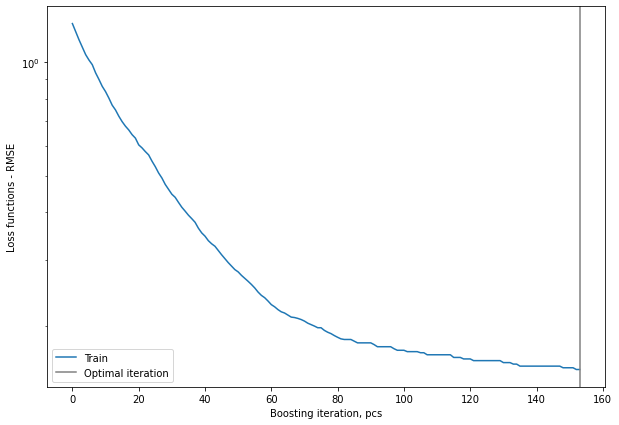

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  0.53
RMSE: 0.2
Relative RMSE(%):  -0.610
MSE: 0.0
R square: 98.0%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.027
a1: 0.896
R^2: 0.989
Uncertainty
a0: -0.027+/-0.010
a1: 0.896+/-0.009


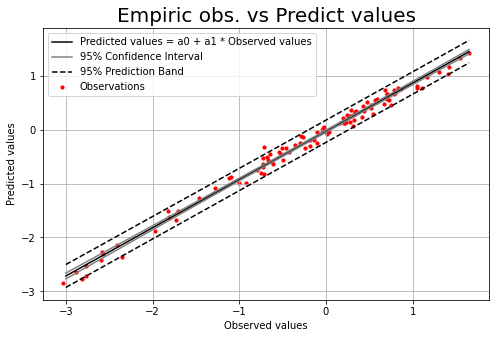

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

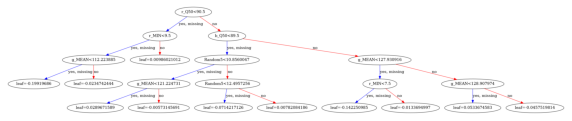

In [43]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

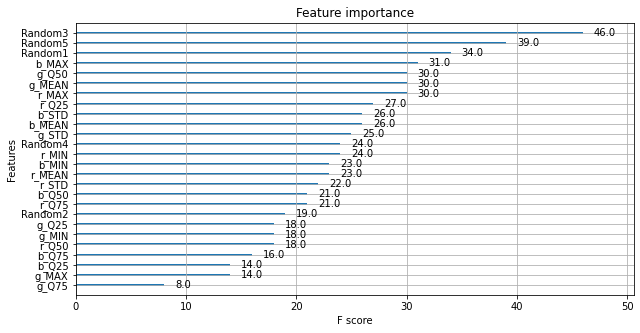

In [36]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

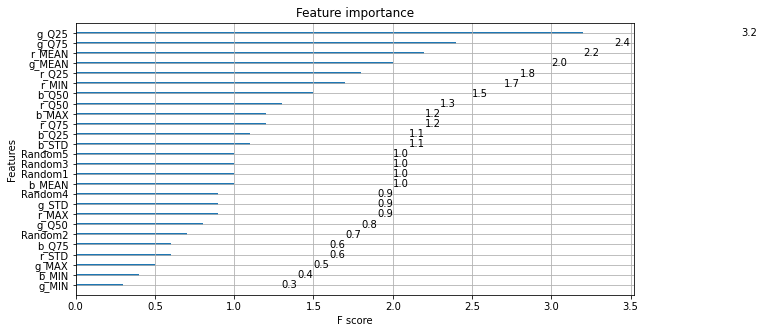

In [37]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

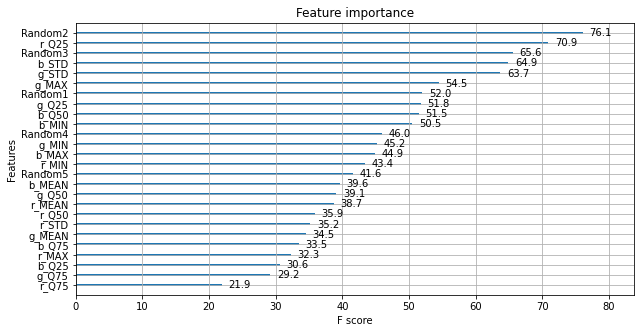

In [38]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [39]:
# Load SHAP`s library
import shap

In [40]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


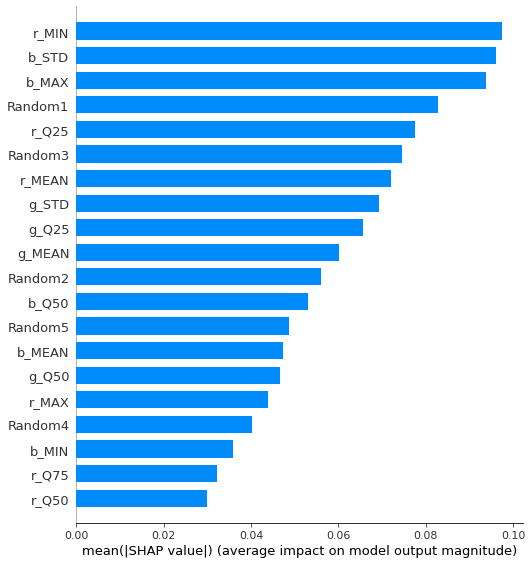

In [41]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

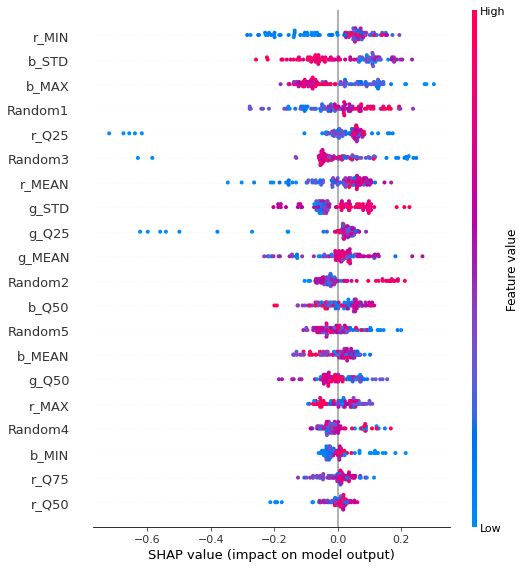

In [42]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

In [ ]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.txt")